# Визуализация данных

Автор: **Булыгин Олег**
* [Я в LinkedIn](https://www.linkedin.com/in/obulygin/)  
* [Мой канал в ТГ по Python](https://t.me/pythontalk_ru)
* [Чат канала](https://t.me/pythontalk_chat)
* [Блог в Телетайпе](https://teletype.in/@pythontalk)

Визуализация данных – это представление данных в виде, который обеспечивает наиболее эффективную работу человека по их изучению.

Очень важный инструмент в рамках [EDA](https://en.wikipedia.org/wiki/Exploratory_data_analysis), который облегчает определение распределений, поиск аномалий, зависимостей, первичное выдвижение гипотез и пр.

Важность визуализации может продемонстрировать [квартет Энскомба](https://en.wikipedia.org/wiki/Anscombe%27s_quartet).

In [ ]:
import pandas as pd
import numpy as np

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 11, 7

## <center> Matplotlib

Matplotlib – одна из самых старых и популярных библиотек Python для визуализации данных.

В pandas частично встроен функционал из matplotlib.

Документация: https://matplotlib.org/contents.html

In [ ]:
import matplotlib.pyplot as plt

## <center> Seaborn
   
Seaborn – популярная библиотека готовых шаблонов для статистической визуализации, написанная на основе matplotlib.

Имеет выразительный высокоуровневый интерфейс (построение большинства простых графиков происходит в одну строчку кода), а встроенные в нее стили более приятны.
C помощью `seaborn` можно построить достаточно сложные визуализации, которые были бы очень сложны для представления в коде при использовании `matplotlib`.

Библиотека названа в честь Сэмюела Нормана Сиборна (S.N.S) – героя сериала The West Wing, который очень любил автор библиотеки)

Документация: https://seaborn.pydata.org/tutorial.html

In [ ]:
import seaborn as sns

## Plotly express


Библиотека Plotly является сравнительно новым коммерческим продуктом с бесплатной версией, который создавался специально для Data Science, в отличие от относительно старой библиотеки Matplotlib, которая изначально разрабатывалась для научных вычислений.

Библиотека Plotly позволяет строить интерактивные графики, которые можно приближать, отдалять, а также просматривать значения на графике в реальном времени. К тому же в библиотеке собрано огромнейшее количество красочных методов визуализации. У Plotly приятный дизайн, а способов работы с ней несколько.

Plotly позволяет строить графики в нескольких режимах. У plotly express функциональность скромнее, чем у полного режима Plotly, но нам её будет более чем достаточно. Для работы в экспресс-режиме предназначен модуль plotly.express.

In [ ]:
import plotly.express as px

Поработаем с данными о продажах и оценках видео-игр с [Kaggle Datasets](https://www.kaggle.com/ashaheedq/video-games-sales-2019?select=vgsales-12-4-2019.csv).

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/obulygin/content/main/video_games_sales/vgsales.csv')

In [ ]:
df.shape

In [ ]:
df.head()

In [ ]:
df.info()
# что видим?

In [ ]:
# почему в User_Score object?
df['User_Score'].unique()

In [ ]:
df['User_Score'] = df['User_Score'].replace('tbd', np.NaN)
df['User_Score'].unique()

In [ ]:
# исправим типы данных
df['Year_of_Release'] = df['Year_of_Release'].astype('Int64')
# df['Year_of_Release'] = df['Year_of_Release'].astype('int64')
df['User_Count'] = df['User_Count'].astype('Int64')
df['User_Score'] = df['User_Score'].astype('float64')
df['Critic_Count'] = df['Critic_Count'].astype('Int64')

# переводим оценки в один формат
df['User_Score'] = df['User_Score'] * 10

In [ ]:
df.info()

## Линейчатый график

– один из наиболее часто используемых типов визуализаций.

Отлично подходит, если:
- набор данных непрерывен;
- количество значений больше 20;
- необходимо выявить тенденцию.

Построим график динамики продаж видеоигр по годам.

In [ ]:
dynamics_by_region = df.groupby('Year_of_Release')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum()
dynamics_by_region

In [ ]:
# если работает с табличными структурами, то можем воспользоваться функционалом,
# встроенным в pandas. Как правило, так удобнее
# Метод plot по-умолчанию использует индекс датафрейма для оси Y
# метод plot по-умолчанию строит график
dynamics_by_region['Global_Sales'].plot(title='Динамика продаж видеоигр',
                                        xlabel='Год',
                                        ylabel='Продажи, млн.')

In [ ]:
# plot без цикла построит графики для каждого региона (столбца)
# если у plot нету нужных параметров, то можно применить функции matplotlib
dynamics_by_region.plot(title='Динамика продаж видеоигр',
                             xlabel='Год',
                             ylabel='Продажи, млн.')
plt.text(2007, 680, 'Почему отсюда начался спад?')
plt.legend(loc='upper left')
# plt.savefig('dynamics_by_region.png')

Попробуем использовать plotly express

In [ ]:
fig = px.line(
    dynamics_by_region,
    x=dynamics_by_region.index,
    y='Global_Sales',
    title='Динамика продаж видеоигр'
)
fig.show()

## Area chart

аналогична графику, но пространство между осью Х и линией графика заполняется цветом или рисунком.

Лучше всего подходит для отображения изменений в составе комплексной величины с течением времени.

Если категорий больше 3-5, то ее использование вряд ли будет оправдано.


In [ ]:
# по-умолчанию  Area chart всегда накопительный
dynamics_by_region.drop('Global_Sales', axis=1).plot(kind='area',
                                                     title='Динамика продаж видеоигр',
                                                     xlabel='Год',
                                                     alpha=0.5,
                                                     ylabel='Продажи, млн.')


А теперь Plotly

In [ ]:
# используем функцию area для создания area chart с заливкой и стэкированием
fig = px.area(dynamics_by_region, x=dynamics_by_region.index, y=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], title="Total sales per year by region (Millions)",
            )

# задаем поворот меток на оси x
fig.update_xaxes(tickangle=45)

# отображаем график
fig.show()

## Столбчатая диаграмма

идеально подходит для сравнения показателей.

Горизонтальные столбчатые диаграммы обычно используют, когда нужно сравнить показатели между собой.

А вертикальные вариант хорошо подходит для демонстрации изменения показателя в разные периоды.

In [ ]:
# количество игр в разрезе платформ
games_by_platforms = df.groupby('Platform')[['Name']].count()
games_by_platforms

,Name
Platform,
2600,133
3DO,3
3DS,520
DC,52
DS,2152
GB,98
GBA,822
GC,556
GEN,27


<Axes: title={'center': 'Топ 5 платформ по количеству и игр'}, xlabel='Платформа', ylabel='Количество игр'>

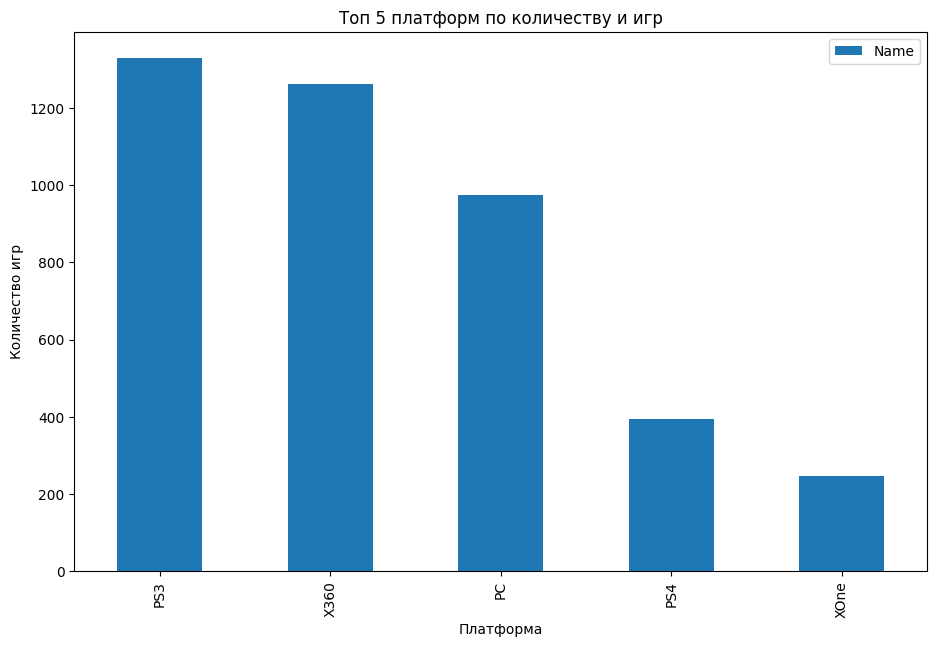

In [ ]:
games_by_platforms.loc[['PC', 'X360', 'PS3', 'PS4', 'XOne']].sort_values(by='Name', ascending=False).plot(kind='bar',
                                                                  title='Топ 5 платформ по количеству и игр',
                                                                  xlabel='Платформа',
                                                                  ylabel='Количество игр')

[Text(0, 0, '1745.27'),
 Text(0, 0, '1332'),
 Text(0, 0, '1052.94'),
 Text(0, 0, '934.4'),
 Text(0, 0, '828.08')]

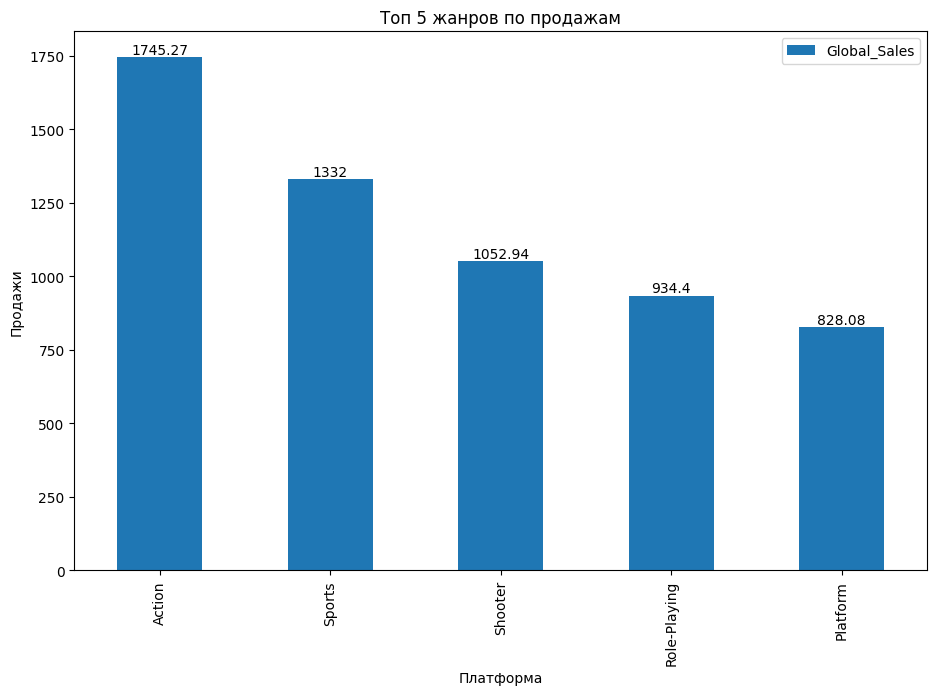

In [ ]:
# топ-5 жанров по продажам
top5_genres = df[['Global_Sales', 'Genre']].groupby('Genre').sum().sort_values('Global_Sales', ascending=False).head(5)
ax = top5_genres.plot(kind='bar', title='Топ 5 жанров по продажам',
                             xlabel='Платформа',
                             ylabel='Продажи')
ax.bar_label(ax.containers[0])


In [ ]:
# Сортировка данных по убыванию
sorted_data = df.sort_values(by='Global_Sales', ascending=False)

# Создание гистограммы с отсортированными данными
fig = px.histogram(
    sorted_data,
    x='Global_Sales',
    y='Genre',
    color='Genre',
    title='Продажи игр по жанрам'
)
fig.update_yaxes(categoryorder='total ascending')

fig.show()

<Axes: xlabel='Year_of_Release'>

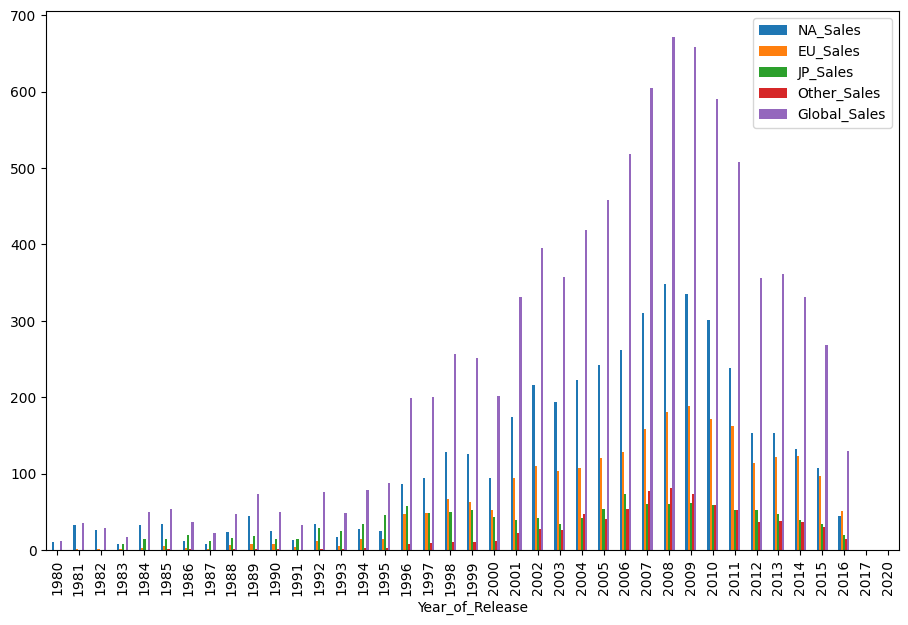

In [ ]:
# динамика продаж в разрезе регионов. Плохо :(
dynamics_by_region.plot(kind='bar')

<Axes: xlabel='Year_of_Release'>

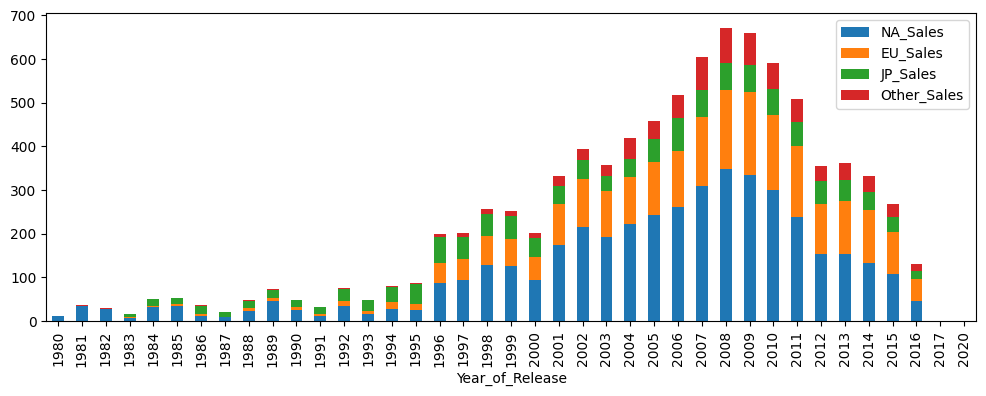

In [ ]:
# Сделаем с накоплением!
dynamics_by_region.drop('Global_Sales', axis=1).plot(kind='bar', stacked=True, figsize=(12, 4))

## Круговая диаграмма

[~~худшая диаграмма на свете~~](https://habr.com/ru/company/otus/blog/424647/)  
распространенный способ показать структуру набора данных (какую часть от общего количества составляют отдельные значения).
  
Круговые диаграммы не предназначены для сравнения отдельных категорий друг с другом.

По возможности избегайте их. Мы хорошо воспринимаем длины и размеры, но углы и площади нам воспринимать и сравнивать тяжело.


<Axes: title={'center': 'Количество игр по платформам'}, ylabel='Platform'>

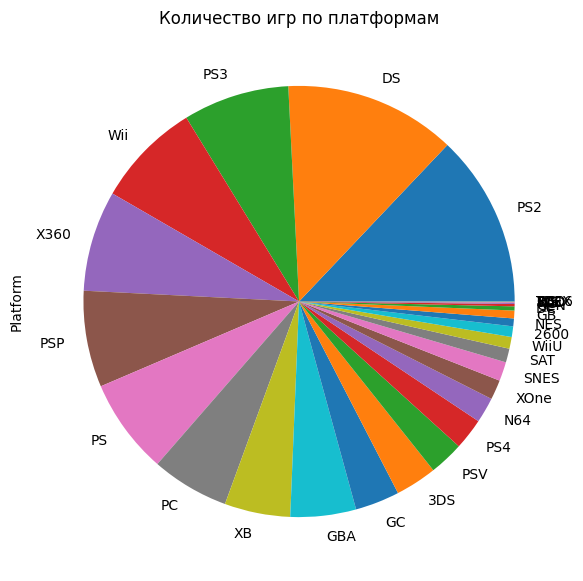

In [ ]:
# количество игр по платформам
pie_data = df['Platform'].value_counts()

pie_data.plot(kind='pie', title='Количество игр по платформам')

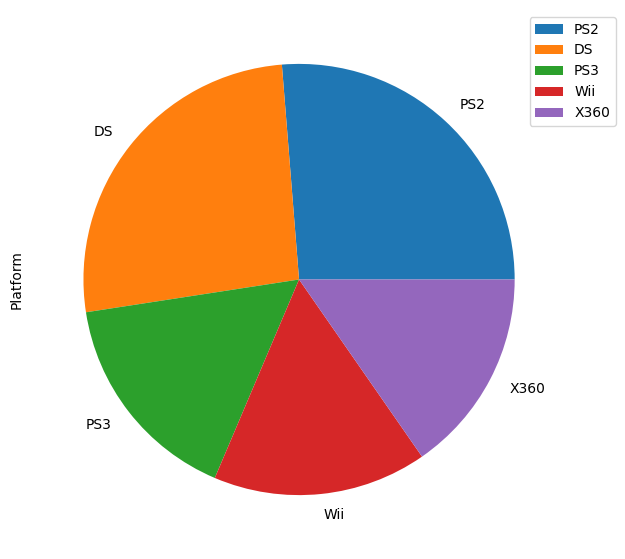

In [ ]:
# количество игр по платформам (берем только топ-5)
top_platforms = df['Platform'].value_counts().head(5)
top_platforms.plot(kind='pie')
plt.legend(bbox_to_anchor=(0.6, .5, 0.5, 0.5))

In [ ]:
fig = px.pie(
    data_frame=df,
    names='Genre',
    title='Доля игр по жанрам',
    hole=0.2
)
fig.show()

## Гистограммы

используется в статистике для представления распределения величины.

По горизонтальной оси откладывается диапазон наблюдаемых значений, разбитый на определенное число (обычно 10-15) интервалов, а по вертикальной – вероятность или частота ее попадания в каждый интервал.

По форме гистограммы аналитик может оценить, какому статистическому закону распределения подчиняется величина.


<Axes: title={'center': 'Распределение оценок пользователей'}, ylabel='Frequency'>

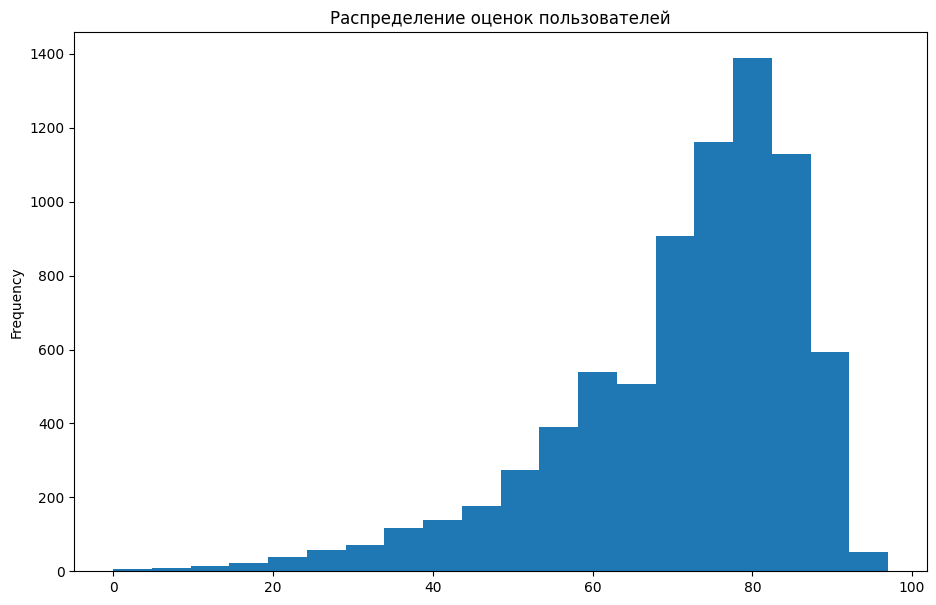

In [ ]:
# распределение оценок пользователей
df['User_Score'].plot(kind='hist',
                   title='Распределение оценок пользователей', bins=20)

<Axes: title={'center': 'Распределение оценок критиков'}, ylabel='Frequency'>

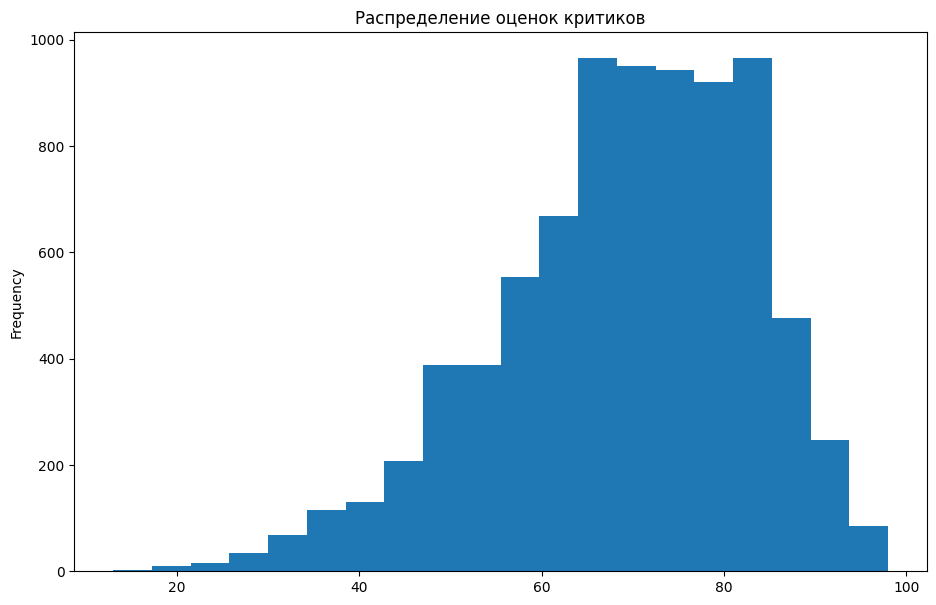

In [ ]:
# распределение оценок критиков
df['Critic_Score'].plot(kind='hist',
                     title='Распределение оценок критиков', bins=20)

Text(0.5, 1.0, 'Сравнение распределений оценок видеоигр')

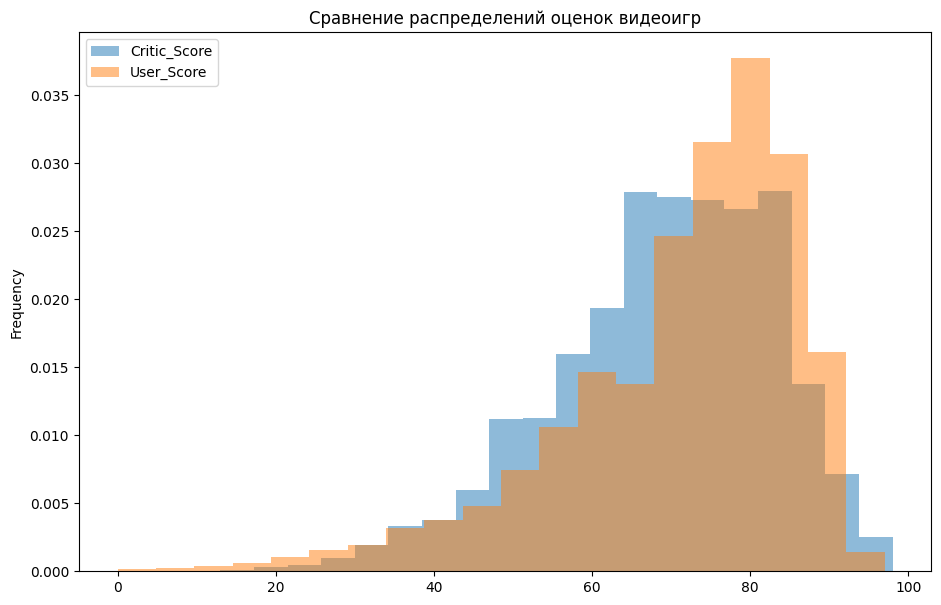

In [ ]:
# сравнение
df['Critic_Score'].plot(kind='hist',
                     alpha = 0.5,
                     bins=20,
                     density=True)


df['User_Score'].plot(kind='hist',
                     alpha = 0.5,
                     bins=20,
                     density=True)
plt.legend(loc='upper left')
plt.title('Сравнение распределений оценок видеоигр')

Text(0.5, 1.0, 'Распределение оценок критиков')

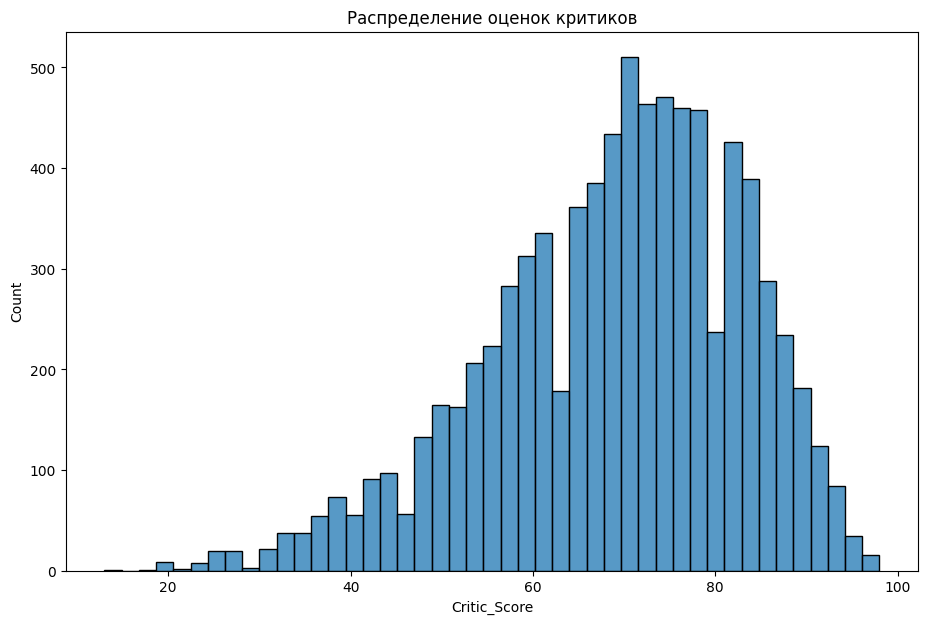

In [ ]:
sns.histplot(df['Critic_Score'])
plt.title('Распределение оценок критиков')

## Boxplot

используется в описательной статистике, компактно изображает распределение величин. Одна из немногих визуализаций, позволяющая показать выбросы.

In [ ]:
# очень хорошо подходит для поиска выбросов!
df['User_Score'].plot(kind='box',
                   title='Распределение оценок пользователей', grid=True)

<Axes: title={'center': 'Распределение оценок'}>

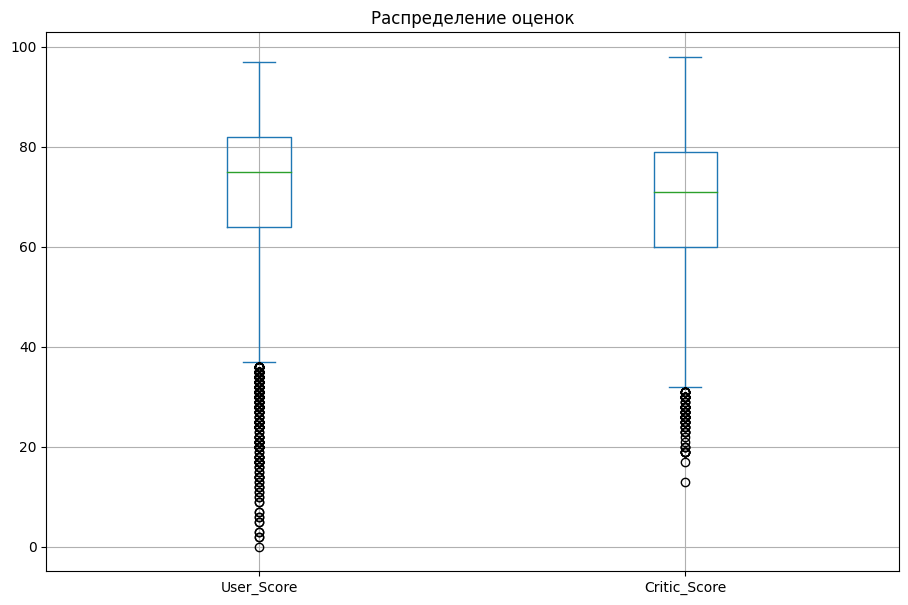

In [ ]:
df[['User_Score', 'Critic_Score']].plot(kind='box',
                                        title='Распределение оценок', grid=True)

Давайте **сравним оценки критиков игр для топ-10 крупнейших игровых платформ**.

<Axes: xlabel='Platform', ylabel='Critic_Score'>

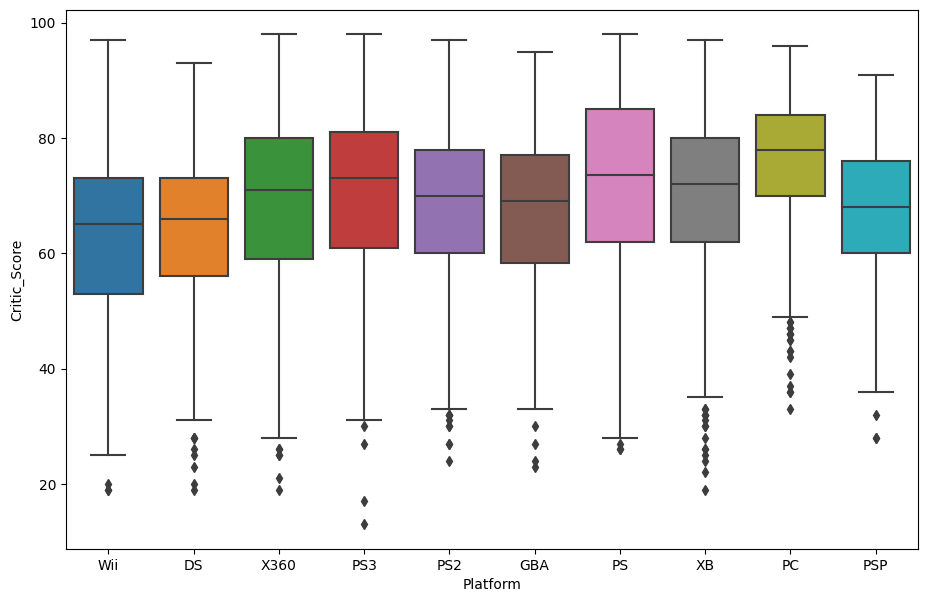

In [ ]:
top_platforms = df['Platform'].value_counts().sort_values(ascending=False).head(10).index.values
top_platforms
sns.boxplot(x="Platform", y="Critic_Score",
            data=df[df['Platform'].isin(top_platforms)])

In [ ]:
fig = px.box(
    data_frame=df,
    x='Genre',
    y='User_Score',
    color='Genre',
    title='Distribution of user score by genre',
)
fig.show()

In [ ]:
fig = px.violin(
    df,
    x='Genre',
    y='User_Score',
    color='Genre',
    title='Распределение оценок пользователей',
)
fig.show()

Очень удобно совмещать гистограмму с боксплотом для изучения распределений

In [ ]:
fig = px.histogram(
    data_frame=df,
    x='Critic_Score',
    title='Распределение оценок критиков',
    marginal='box',
    histnorm='percent'
)
fig.show()

In [ ]:
fig = px.histogram(
    data_frame=df,
    x=['Critic_Score', 'User_Score'],
    title='Распределение оценок пользователей и критиков',
    marginal='box',
    barmode='overlay',
    labels={'variable': 'Оценки', 'count': 'Количество'},
    color_discrete_sequence=['blue', 'orange']
)

fig.show()

## Точечная диаграмма

Каждому наблюдению соответствует точка, координаты которой равны значениям двух параметров этого наблюдения.

Используются для изучения взаимосвязи между двумя переменными. Также помогают выявлять выбросы.


(0.0, 40.0)

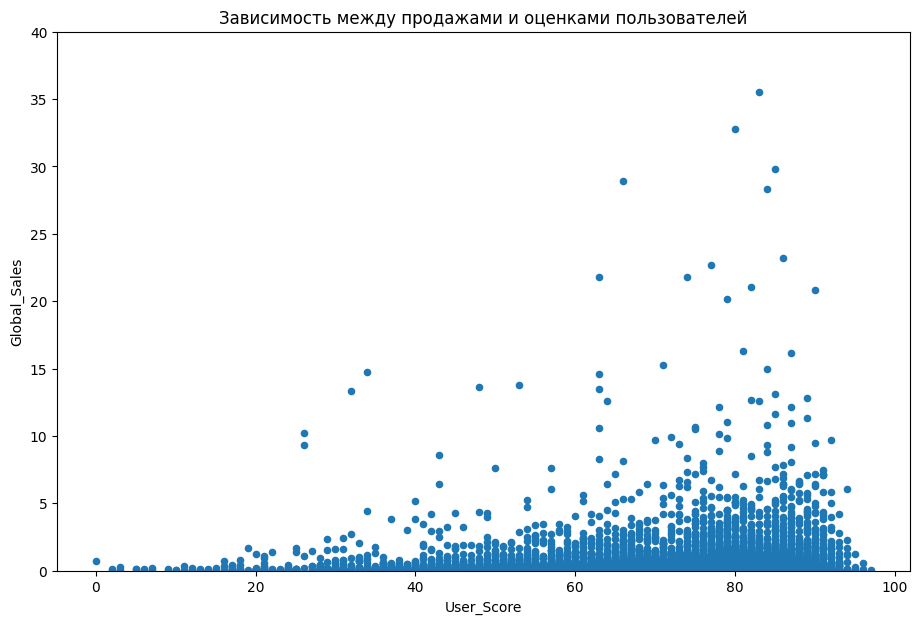

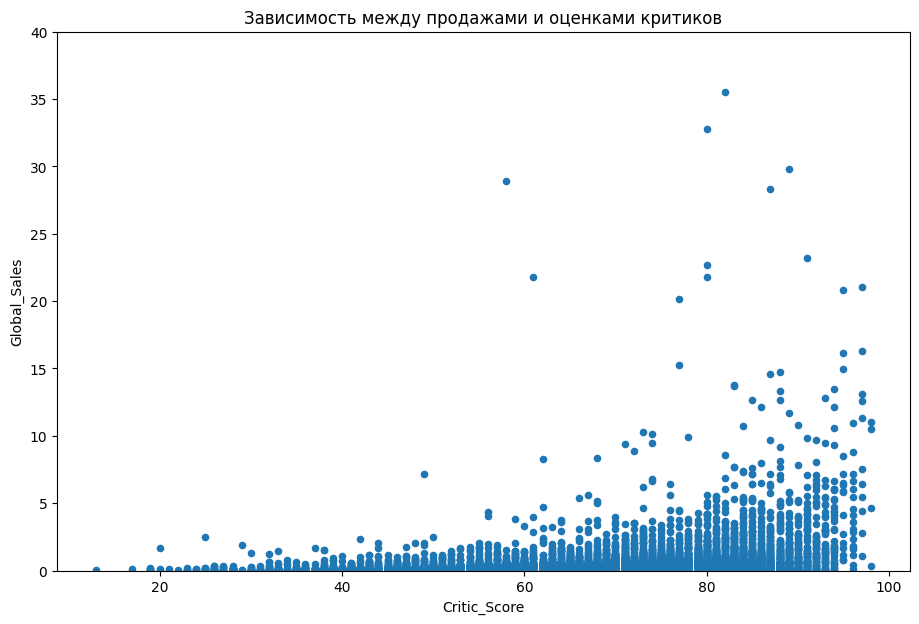

In [ ]:
# посмотрим на взаимосвязь оценок и продаж
df.plot(kind='scatter',
        x='User_Score',
        y='Global_Sales',
        title='Зависимость между продажами и оценками пользователей')
plt.ylim(0, 40)
df.plot(kind='scatter',
        x='Critic_Score',
        y='Global_Sales',
        title='Зависимость между продажами и оценками критиков')
plt.ylim(0, 40)

In [ ]:
# посмотрим зависимость продаж и оценок критиков
sns.regplot(data=df, x='Critic_Score', y='Global_Sales', color='green', marker='+')
plt.title('Взаимосвязь продажам и оценок критиков')
plt.ylim(0, 40)

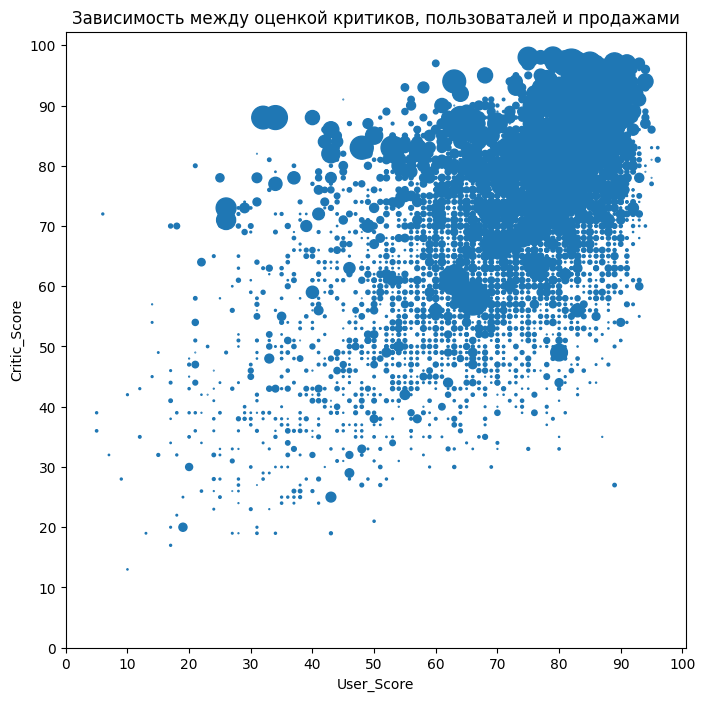

In [ ]:
# добавим третью ось
df.plot(kind='scatter',
        x='User_Score',
        y='Critic_Score',
        s=df['Global_Sales']*20,
        title='Зависимость между оценкой критиков, пользоваталей и продажами',
        figsize=(8, 8)
       )
plt.xticks(range(0, 101, 10))
plt.yticks(range(0, 101, 10))
plt.show()

In [ ]:
scores_genres_df = df.groupby('Genre')[['Critic_Score', 'User_Score']].median()
sales_genres_df = df.groupby('Genre')[['Global_Sales']].sum()

genres_df = scores_genres_df.join(sales_genres_df)

fig = px.scatter(genres_df, x='Critic_Score', y='User_Score', size='Global_Sales', color=genres_df.index)

fig.update_layout(
    title='Statistics of video games genres',
    xaxis_title='Critic Score',
    yaxis_title='User Score'
)

fig.show()

Для того чтобы подробнее посмотреть на взаимосвязь двух численных признаков можно использовать __`joint_plot`__ – это гибрид `scatter plot` и `histogram`. Посмотрим на то, как связаны между собой **оценка критиков `Critic_Score` и оценка пользователя `User_Score`**.

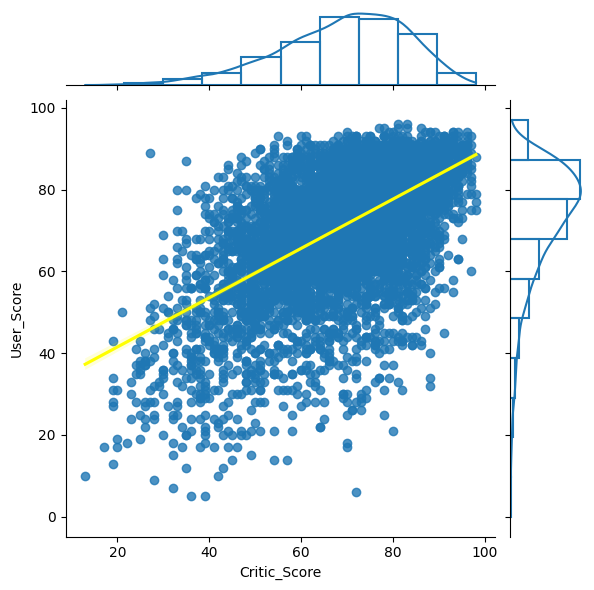

In [ ]:
sns.jointplot(x='Critic_Score', y='User_Score', data=df, kind='reg', marginal_kws=dict(bins=10, fill=False), joint_kws={'line_kws':{'color':'yellow'}})

**pair plot (scatter plot matrix)** поможет нам посмотреть на одной картинке, как связаны между собой различные признаки в наборе данных

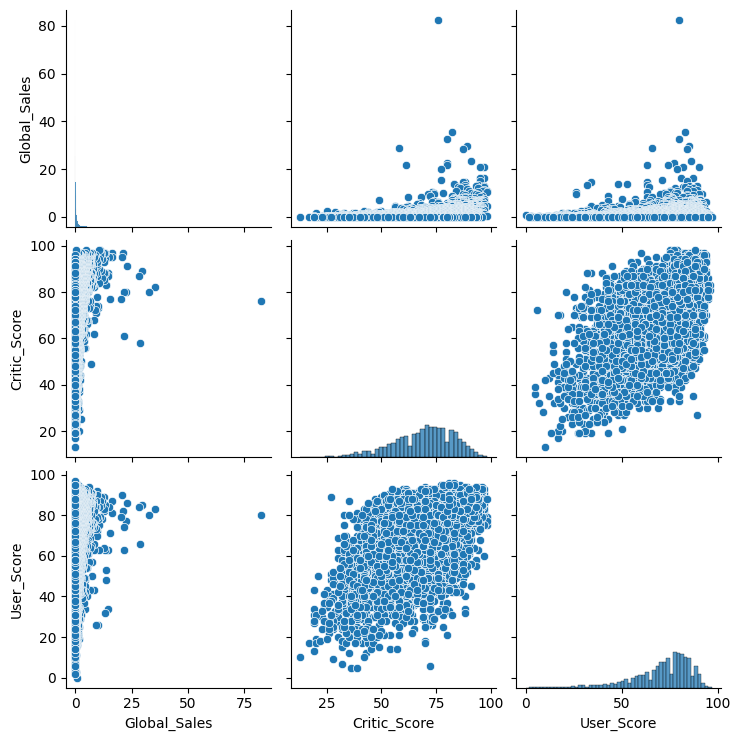

In [ ]:
sns.pairplot(df[['Global_Sales', 'Critic_Score', 'User_Score']])

## Heatmap

`Heat map` позволяет посмотреть на распределение какого-то численного признака по двум категориальным. Визуализируем **суммарные продажи игр по жанрам и игровым платформам**.

In [ ]:
platform_genre_sales = df[df['Platform'].isin(top_platforms)].pivot_table(
                        index='Platform',
                        columns='Genre',
                        values='Global_Sales',
                        aggfunc=sum).fillna(0)

platform_genre_sales

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Platform,,,,,,,,,,,,
DS,112.70,45.90,7.11,135.72,75.92,82.72,38.10,124.44,7.92,130.29,31.41,14.87
GBA,55.76,14.68,4.21,36.25,78.30,12.92,18.80,64.21,3.60,5.91,16.41,7.45
PC,31.71,10.04,0.29,8.57,0.49,0.92,3.99,47.72,45.92,52.61,12.01,46.03
PS,127.05,20.97,72.68,44.90,64.21,12.08,103.19,78.30,39.31,25.33,120.97,21.69
PS2,272.76,21.16,92.60,101.14,72.51,5.90,156.28,93.50,108.57,42.66,273.41,15.15
PS3,301.55,22.28,51.08,46.88,29.71,0.58,72.13,73.67,192.46,10.39,133.88,4.82
PSP,64.11,10.68,21.82,13.91,17.09,5.52,34.29,48.98,19.66,6.23,41.51,10.50
Wii,114.51,17.83,23.36,216.37,88.92,15.37,60.25,13.70,28.15,36.03,288.61,5.03
X360,239.69,14.94,37.34,91.54,11.32,0.85,65.00,71.31,276.98,14.18,138.45,10.03


<Axes: xlabel='Genre', ylabel='Platform'>

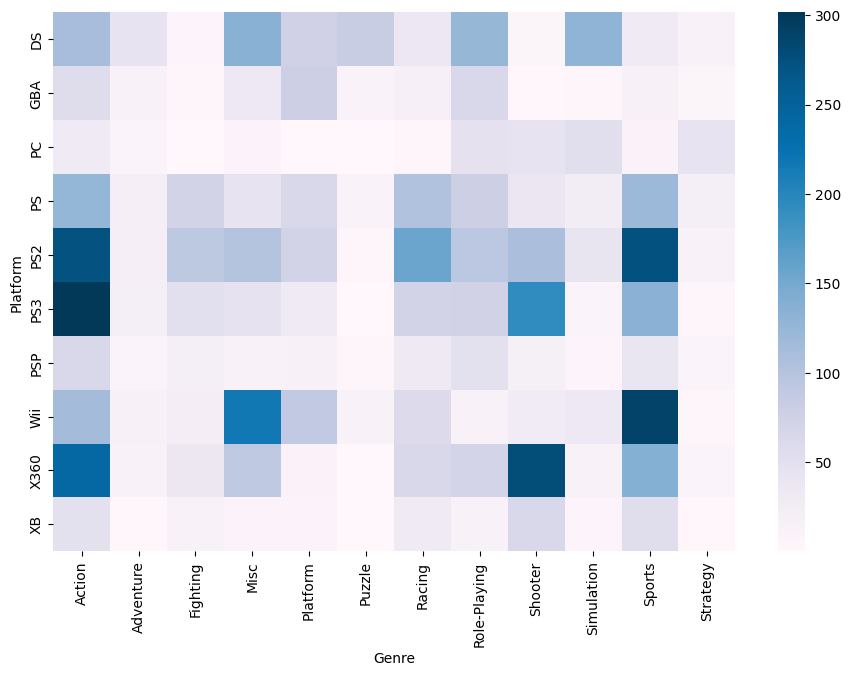

In [ ]:
sns.heatmap(platform_genre_sales, cmap='PuBu')

## Что ещё изучить?

[Руководство по subplots в matplotlib](https://teletype.in/@pythontalk/matplotlib_subplot_tutorial)

[PythonGraphGallery](https://www.python-graph-gallery.com/)  